I modeled my code after renukadevird for kaggle.com, https://www.kaggle.com/renukadevird/crypto-corr

In [ ]:
His intial program execution:
# Load Data
# Understanding Data
# Data cleaning and preparation
# Drop columns
# Missing data
# Data aggregation
# Understanding the trends
# Analysing the combined trends

# Average closing value
# Marketcap
# Closing volume
# Comparining the trends between 2020 - 2021

# Correlation

In [282]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# scaler = StandardScaler()
# print(scaler.fit(np.array(values).reshape(-1, 1)))
# from sklearn.preprocessing import StandardScaler



In [314]:
# use these as the keys to map, add name of coin here so don't need to do it everywhere else
crypto_names = ['Bitcoin', 'Shibainu', 'Saitama']

#load coin data
c_bitcoin = pd.read_csv('bitcoin-coinmarketcap.csv')
c_shibainu = pd.read_csv('shibainu-coinmarketcap.csv')
c_saitama = pd.read_csv('saitama-coinmarketcap.csv')

coin_dict = {crypto_names[0]:c_bitcoin, crypto_names[1]:c_shibainu, crypto_names[2]:c_saitama}

#hold the raw data for each coin in this array so we can loop through later
raw_data = [c_bitcoin, c_shibainu, c_saitama]
raw_data_coin_names = ["Bitcoin", "Shibainu", "Saitama"]

In [315]:
def print_data_dimensions(coin_name, df):
    display(df.head())
    print("\033[1m" + coin_name + "\033[0m")

In [316]:
# for coin_name in coin_dict:
#     print_data_dimensions(coin_name, coin_dict[coin_name])

In [317]:
#check coin data for null values
def check_coin_data_for_null(coin_name, df):
    print("\033[1m" + coin_name + "\033[0m NaN", np.any(df.isna()))
    #display(df.info())

In [318]:
for coin_name in coin_dict:
    check_coin_data_for_null(coin_name, coin_dict[coin_name])

Bitcoin NaN False
Shibainu NaN False
Saitama NaN False


In [336]:
#split the data into features and target per coin
Xs_raw_data = dict.fromkeys(crypto_names, [])
Ts_raw_data = dict.fromkeys(crypto_names, [])

for coin_name in coin_dict:
    coin_raw_data = coin_dict[coin_name]
    first_cols = coin_raw_data.iloc[:, 0:4].copy()
    last_cols = coin_raw_data.iloc[:, 5:].copy()
    first_cols.reset_index(drop=True, inplace=True)
    last_cols.reset_index(drop=True, inplace=True)
    
    features = [first_cols, last_cols]
    Xs_raw_data[coin_name] = pd.concat(features, axis=1) #training data of this coin
    
    close_col = coin_raw_data.iloc[:, 4].copy()
    date_col = coin_raw_data.iloc[:, 0].copy()
    
    target_close = [date_col, close_col]
    Ts_raw_data[coin_name] = pd.concat(target_close, axis=1) #target data of this coin
    
#display(Xs_raw_data)
#display(Ts_raw_data)

In [337]:
#reformat Date column
for coin_name in crypto_names:
    date_data = Xs_raw_data[coin_name]['Date']
    Xs_raw_data[coin_name]['Date'] = pd.to_datetime(date_data, format='%d-%b-%y').dt.date #remove time
    
    date_data = Ts_raw_data[coin_name]['Date']
    Ts_raw_data[coin_name]['Date'] = pd.to_datetime(date_data, format='%d-%b-%y').dt.date #remove time
    
# display(Xs_raw_data)
# display(Ts_raw_data)

In [325]:
#drop unnecessary features
for coin_name in crypto_names:
    Xs_raw_data[coin_name].drop(['Open*','High','Low'], axis = 1, inplace = True)
    
display(Xs_raw_data)

{'Bitcoin':           Date       Volume    Market Cap
 0   2022-02-04  29412210792  786396684548
 1   2022-02-03  18591534769  704010232687
 2   2022-02-02  19155189416  700155817836
 3   2022-02-01  20288500328  734039224255
 4   2022-01-31  20734730465  729073641688
 5   2022-01-30  14643548444  718325967803
 6   2022-01-29  17194183075  722469136410
 7   2022-01-28  22238830523  715731622071
 8   2022-01-27  25041426629  703456873493
 9   2022-01-26  31324598034  698006361956
 10  2022-01-25  26428189594  699907393886
 11  2022-01-24  41856658597  694196560317
 12  2022-01-23  26017975951  687012848062
 13  2022-01-22  39714385405  663374008017
 14  2022-01-21  43011992031  690368973093
 15  2022-01-20  20382033940  770304579439
 16  2022-01-19  23091543258  790406427118
 17  2022-01-18  22417209227  802313747480
 18  2022-01-17  21690904261  799910089279
 19  2022-01-16  17902097845  816211499221
 20  2022-01-15  18371348298  817364571824
 21  2022-01-14  23577403399  815850639036


In [338]:
# use Date as the row index instead of the default row numbers
for coin_name in crypto_names:
    coin_data_indexed_by_date = {}
    coin_raw = Xs_raw_data[coin_name]
    coin_data_indexed_by_date = (pd.pivot_table(coin_raw,values=['Volume','Market Cap']
                        ,index=['Date']))
    print('coin_data_indexed_by_date', coin_data_indexed_by_date)
    Xs_raw_data[coin_name]=coin_data_indexed_by_date
    
    coin_raw = Ts_raw_data[coin_name]
    coin_data_indexed_by_date = (pd.pivot_table(coin_raw,values=['Close**']
                        ,index=['Date']))
    Ts_raw_data[coin_name]=coin_data_indexed_by_date
    

coin_data_indexed_by_date               Market Cap       Volume
Date                                 
2022-01-01  902104193385  24582667004
2022-01-02  895688387523  27951569547
2022-01-03  878946596803  33071628362
2022-01-04  868383282082  42494677905
2022-01-05  824368284530  36851084859
2022-01-06  816685390313  30208048289
2022-01-07  786389774194  84196607520
2022-01-08  789758782727  28066355845
2022-01-09  793156354744  21294384372
2022-01-10  791484886194  32104232331
2022-01-11  808834801011  26327648900
2022-01-12  831836978396  33499938689
2022-01-13  806189762638  47691135082
2022-01-14  815850639036  23577403399
2022-01-15  817364571824  18371348298
2022-01-16  816211499221  17902097845
2022-01-17  799910089279  21690904261
2022-01-18  802313747480  22417209227
2022-01-19  790406427118  23091543258
2022-01-20  770304579439  20382033940
2022-01-21  690368973093  43011992031
2022-01-22  663374008017  39714385405
2022-01-23  687012848062  26017975951
2022-01-24  694196560317

In [343]:
#split the features/target into training and testing data
Xs_train = dict.fromkeys(crypto_names, [])
Xs_test = dict.fromkeys(crypto_names, [])
Ts_train = dict.fromkeys(crypto_names, [])
Ts_test = dict.fromkeys(crypto_names, [])

for coin_name in coin_dict:
    X_train, X_test, t_train, t_test = train_test_split(Xs_raw_data[coin_name] \
                                                        , Ts_raw_data[coin_name] \
                                                        ,test_size=0.2, random_state=1)
    Xs_train[coin_name] = X_train
    Xs_test[coin_name] = X_test
    Ts_train[coin_name] = t_train
    Ts_test[coin_name] = t_test

In [340]:
display(Xs_raw_data)

{'Bitcoin':               Market Cap       Volume
 Date                                 
 2022-01-01  902104193385  24582667004
 2022-01-02  895688387523  27951569547
 2022-01-03  878946596803  33071628362
 2022-01-04  868383282082  42494677905
 2022-01-05  824368284530  36851084859
 2022-01-06  816685390313  30208048289
 2022-01-07  786389774194  84196607520
 2022-01-08  789758782727  28066355845
 2022-01-09  793156354744  21294384372
 2022-01-10  791484886194  32104232331
 2022-01-11  808834801011  26327648900
 2022-01-12  831836978396  33499938689
 2022-01-13  806189762638  47691135082
 2022-01-14  815850639036  23577403399
 2022-01-15  817364571824  18371348298
 2022-01-16  816211499221  17902097845
 2022-01-17  799910089279  21690904261
 2022-01-18  802313747480  22417209227
 2022-01-19  790406427118  23091543258
 2022-01-20  770304579439  20382033940
 2022-01-21  690368973093  43011992031
 2022-01-22  663374008017  39714385405
 2022-01-23  687012848062  26017975951
 2022-01-24  6

In [341]:
Xs_raw_data['Shibainu']

,Market Cap,Volume
Date,,
2022-01-01,18742539593,608789558
2022-01-02,18692252748,574109134
2022-01-03,18168398066,720676202
2022-01-04,17837039432,717218977
2022-01-05,16722624279,1138566779
2022-01-06,16887454459,1172523092
2022-01-07,15931057953,1169467775
2022-01-08,15257928180,1081101278
2022-01-09,15553511774,741130328


In [344]:
print(coin_name)
Xs_train[coin_name]

Saitama


,Market Cap,Volume
Date,,
2022-01-28,0,28999060
2022-01-27,0,8493627
2022-02-02,0,20033823
2022-01-18,0,12584718
2022-01-25,0,15847268
2022-01-05,0,57618688
2022-01-03,0,39076070
2022-01-24,0,11908773
2022-01-26,0,10877596


In [375]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, max_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

model = LinearRegression()

eval_names = [
    "MTS",
    "R2",
    'max_err',
    "MAE",
    "MAPE",
    "MSE"
]
print("\t{}\t{}\t{}\t{}\t{}\t{}".format(*eval_names))
for coin_name in crypto_names:
    model.fit(Xs_train[coin_name], Ts_train[coin_name]['Close**'])
    train_score = model.score(Xs_train[coin_name], Ts_train[coin_name])
    
#     Xs_train[coin_name] = X_train
#     Xs_test[coin_name] = X_test
#     Ts_train[coin_name] = T_train
#     Ts_test[coin_name] = T_test

    y_test = model.predict(Xs_test[coin_name])
    
    R2 = r2_score(Ts_test[coin_name], y_test) #best value = 1
    ME = max_error(Ts_test[coin_name], y_test) #the lower the score the better fit, lead to overfitting
    MAE = mean_absolute_error(Ts_test[coin_name], y_test) #best error = 0 (perfect fit), the lower the better
    MSE = mean_squared_error(Ts_test[coin_name], y_test) #same here
    MAPE = mean_absolute_percentage_error(Ts_test[coin_name], y_test) #best value = 0.0, the closer y_test is to 0 the larger the return value
    
    results = [train_score,R2,ME,MAE,MAPE,MSE]
    print(coin_name, "{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(*results))

	MTS	R2	max_err	MAE	MAPE	MSE
Bitcoin 1.00	1.00	13.19	4.58	0.00	37.39
Shibainu 1.00	1.00	0.00	0.00	0.00	0.00
Saitama 0.31	0.67	0.00	0.00	0.29	0.00


IGNORE ALL THE CODE BELOW THIS.

In [13]:
# max Close for each coin
coin_max_closes = {}
for coin_name in coin_data_indexed_by_date:
    print("\033[1m" + coin_name + " Max Close\033[0m"
          ,coin_data_indexed_by_date.get(coin_name)['Close**'].max())
    coin_max_closes[coin_name] = coin_data_indexed_by_date.get(coin_name)['Close**'].max()
    print(coin_max_closes)
#print(coin_max_closes.get('Bitcoin'))

Bitcoin Max Close 47686.81
{'Bitcoin': 47686.81}
Shibainu Max Close 3.414e-05
{'Bitcoin': 47686.81, 'Shibainu': 3.414e-05}
Saitama Max Close 8.45e-08
{'Bitcoin': 47686.81, 'Shibainu': 3.414e-05, 'Saitama': 8.45e-08}


In [14]:
# keep only Close with highest number (max) for each coin in coin_data_indexed_by_date
for coin_name in coin_max_closes:
    coin_data = coin_data_indexed_by_date.get(coin_name)
    #c_btc[c_btc['Close'] == btc]
    coin_max_close = coin_data['Close**'] == coin_max_closes.get(coin_name)
    #print(coin_name, coin_max_close)
    #print(coin_data[coin_data['Close**'] == coin_max_closes.get(coin_name)])
    coin_max_close = coin_data[coin_data['Close**'] == coin_max_closes.get(coin_name)]
    #coin_data_indexed_by_date.update({coin_name:coin_max_close})

In [15]:
# sanity check -- make sure max Close is correct for each coin
for coin_name in coin_data_indexed_by_date:
    coin_data = coin_data_indexed_by_date.get(coin_name)
    display(coin_data[coin_data['Close**'] == coin_max_closes.get(coin_name)])

,Close**,Market Cap,Volume
Date,,,
2022-01-01,47686.81,902104193385,24582667004


,Close**,Market Cap,Volume
Date,,,
2022-01-01,0.000034,18742539593,608789558


,Close**,Market Cap,Volume
Date,,,
2022-01-04,8.450000e-08,0,96159378


In [16]:
for coin_name in coin_data_indexed_by_date:
    max_close = coin_max_closes.get(coin_name)
    print("Highest average value of ", coin_name, max_close,"was recorded on ",
      coin_data_indexed_by_date.get(coin_name).index.values[0])
    print(coin_data_indexed_by_date.get(coin_name).index)
# print("Highest average value of Shibainu ", shiba,"was recorded on ",
#       c_shib[c_shib['Close'] == shib].index.values[0])
# print("Highest average value of Saitama ", saitama,"was recorded on ",
#       c_saitamaSym[c_saitamaSym['Close'] == saitama].index.values[0])

Highest average value of  Bitcoin 47686.81 was recorded on  2022-01-01
Index([2022-01-01, 2022-01-02, 2022-01-03, 2022-01-04, 2022-01-05, 2022-01-06,
       2022-01-07, 2022-01-08, 2022-01-09, 2022-01-10, 2022-01-11, 2022-01-12,
       2022-01-13, 2022-01-14, 2022-01-15, 2022-01-16, 2022-01-17, 2022-01-18,
       2022-01-19, 2022-01-20, 2022-01-21, 2022-01-22, 2022-01-23, 2022-01-24,
       2022-01-25, 2022-01-26, 2022-01-27, 2022-01-28, 2022-01-29, 2022-01-30,
       2022-01-31, 2022-02-01, 2022-02-02, 2022-02-03, 2022-02-04],
      dtype='object', name='Date')
Highest average value of  Shibainu 3.414e-05 was recorded on  2022-01-01
Index([2022-01-01, 2022-01-02, 2022-01-03, 2022-01-04, 2022-01-05, 2022-01-06,
       2022-01-07, 2022-01-08, 2022-01-09, 2022-01-10, 2022-01-11, 2022-01-12,
       2022-01-13, 2022-01-14, 2022-01-15, 2022-01-16, 2022-01-17, 2022-01-18,
       2022-01-19, 2022-01-20, 2022-01-21, 2022-01-22, 2022-01-23, 2022-01-24,
       2022-01-25, 2022-01-26, 2022-01-27,

<class 'sklearn.preprocessing._data.StandardScaler'>


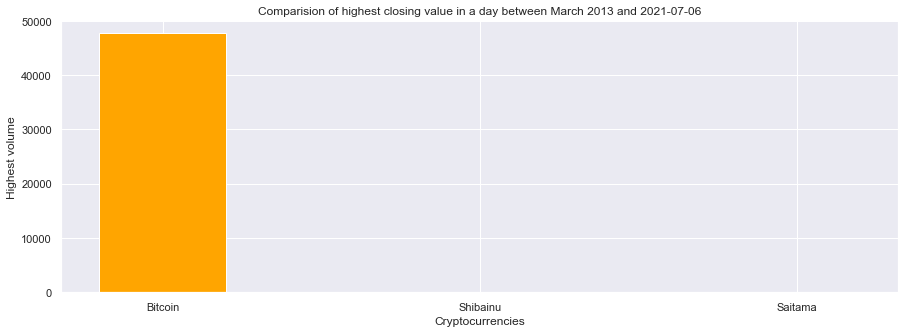

In [43]:
#data = {"Bitcoin":btc,"Shibainu":shiba,"Saitama":saitama}
data = {}
for coin_name in coin_max_closes:
    data[coin_name] = coin_max_closes.get(coin_name)
    
Cryptocurrencies = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (15, 5))

plt.bar(Cryptocurrencies,values,color ='orange', width = 0.4)
plt.xlabel("Cryptocurrencies")
plt.ylabel("Highest volume")
plt.title("Comparision of highest closing value in a day between March 2013 and 2021-07-06")
plt.show()

What is the highest volume transacted in one day between date1 and date2? CHECK

In [18]:
coin_max_volume = {}
for coin_name in coin_data_indexed_by_date:
    print("\033[1m" + coin_name + " Max Volume\033[0m"
          ,coin_data_indexed_by_date.get(coin_name)['Volume'].max())
    coin_max_volume[coin_name] = coin_data_indexed_by_date.get(coin_name)['Volume'].max()
    print(coin_max_volume)

Bitcoin Max Volume 84196607520
{'Bitcoin': 84196607520}
Shibainu Max Volume 2140529993
{'Bitcoin': 84196607520, 'Shibainu': 2140529993}
Saitama Max Volume 96159378
{'Bitcoin': 84196607520, 'Shibainu': 2140529993, 'Saitama': 96159378}


In [19]:
for coin_name in coin_data_indexed_by_date:
    print(coin_name)
    display(coin_data_indexed_by_date.get(coin_name))

Bitcoin


,Close**,Market Cap,Volume
Date,,,
2022-01-01,47686.81,902104193385,24582667004
2022-01-02,47345.22,895688387523,27951569547
2022-01-03,46458.12,878946596803,33071628362
2022-01-04,45897.58,868383282082,42494677905
2022-01-05,43569.00,824368284530,36851084859
2022-01-06,43160.93,816685390313,30208048289
2022-01-07,41557.90,786389774194,84196607520
2022-01-08,41733.94,789758782727,28066355845
2022-01-09,41911.60,793156354744,21294384372


Shibainu


,Close**,Market Cap,Volume
Date,,,
2022-01-01,0.000034,18742539593,608789558
2022-01-02,0.000034,18692252748,574109134
2022-01-03,0.000033,18168398066,720676202
2022-01-04,0.000032,17837039432,717218977
2022-01-05,0.000030,16722624279,1138566779
2022-01-06,0.000031,16887454459,1172523092
2022-01-07,0.000029,15931057953,1169467775
2022-01-08,0.000028,15257928180,1081101278
2022-01-09,0.000028,15553511774,741130328


Saitama


,Close**,Market Cap,Volume
Date,,,
2022-01-01,5.100000e-08,0,9894726
2022-01-02,5.220000e-08,0,11176208
2022-01-03,6.630000e-08,0,39076070
2022-01-04,8.450000e-08,0,96159378
2022-01-05,7.070000e-08,0,57618688
2022-01-06,7.550000e-08,0,33505885
2022-01-07,6.780000e-08,0,33932610
2022-01-08,5.610000e-08,0,60989885
2022-01-09,5.060000e-08,0,33605461


In [20]:
for coin_name in coin_data_indexed_by_date:
    print("Highest average volume of ", coin_name, coin_max_volume.get(coin_name)
          ,"was recorded on ",coin_data_indexed_by_date.get(coin_name).index.values[0])

Highest average volume of  Bitcoin 84196607520 was recorded on  2022-01-01
Highest average volume of  Shibainu 2140529993 was recorded on  2022-01-01
Highest average volume of  Saitama 96159378 was recorded on  2022-01-01


In [21]:
for coin_name in coin_max_closes:
    data[coin_name] = coin_max_closes.get(coin_name)
data = {"Bitcoin":btc,"Shibainu":shiba,"Saitama":saitama}
Cryptocurrencies = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(Cryptocurrencies, values,color ='gold',width = 0.4)
plt.xlabel("Cryptocurrencies")
plt.ylabel("Highest volume")
plt.title("Comparision of highest volume in a day between March 2013 and 2021-07-06")
plt.show()

NameError: name 'btc' is not defined

What is the highest MarketCap in one day between March 2013 and 2021-07-06?

In [22]:
btc = c_btc['Marketcap'].max()
shib = c_shib['Marketcap'].max()
saitama = c_saitamaSym['Marketcap'].max()

NameError: name 'c_btc' is not defined

In [23]:
# finding the highest Marketcap and when 
print("Highest average market capitalization of BTC ", btc,"was recorded on ",
      c_btc[c_btc['Marketcap'] == btc].index.values[0])
print("Highest average market capitalization of SHIB ", shib,"was recorded on ",
      c_shib[c_shib['Market Cap'] == shib].index.values[0])
print("Highest average market capitalization of SAITAMA ", saitama,"was recorded on ",
      c_saitama[c_saitama['Market Cap'] == saitama].index.values[0])

NameError: name 'btc' is not defined

In [24]:
data = {"Bitcoin":btc,"Shibainu":shiba}
Cryptocurrencies = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(Cryptocurrencies, values,color ='purple',width = 0.4)
plt.xlabel("Cryptocurrencies")
plt.ylabel("Highest Marketcap")
plt.title("Comparision of highest Marketcap in a day between March 2013 and 2021-07-06")
plt.show()

NameError: name 'btc' is not defined

NameError: name 'c_btc' is not defined

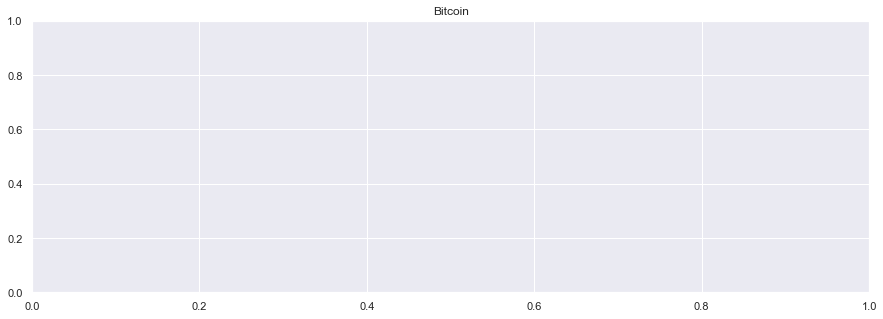

In [25]:
# Finding the trends for each coin
sns.set_theme(style="darkgrid")
plt.figure(figsize=[15,5])
plt.title("Bitcoin")
sns.lineplot(x = c_btc.index , y = 'Close', data = c_btc)
sns.lineplot(x = c_shib.index, y = 'Close', data = c_shib)
plt.show()

NameError: name 'c_shib' is not defined

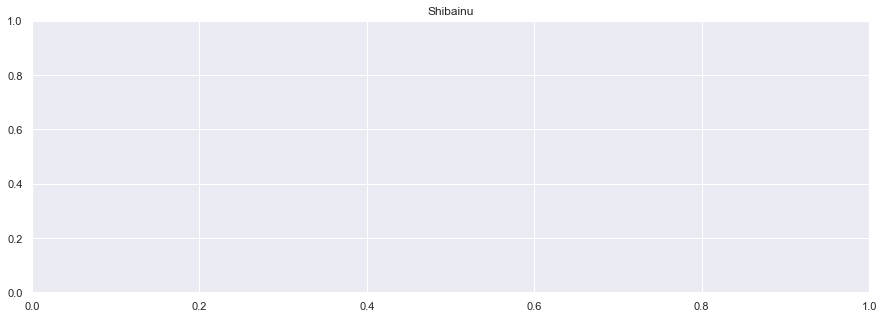

In [26]:
#Finding the trends for each coin
sns.set_theme(style="darkgrid")
plt.figure(figsize=[15,5])
plt.title("Shibainu")
sns.lineplot(x = c_shib.index, y = 'Close', data = c_shib)
plt.show()

NameError: name 'c_saitamaSym' is not defined

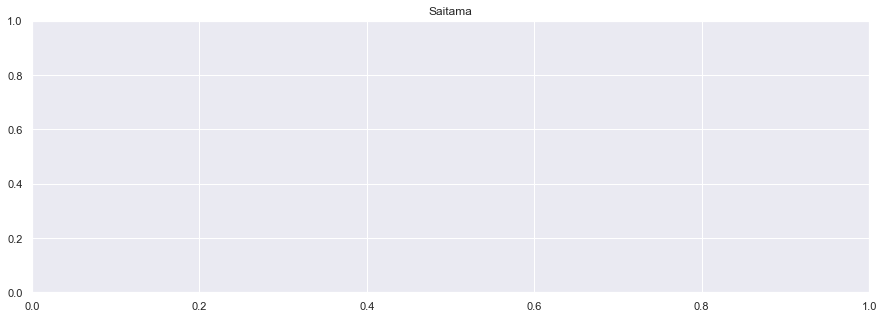

In [27]:
#Finding the trends for each coin
sns.set_theme(style="darkgrid")
plt.figure(figsize=[15,5])
plt.title("Saitama")
sns.lineplot(x = c_saitamaSym.index, y = 'Close', data = c_saitamaSym)
plt.show()

In [28]:
plt.figure(figsize=(15,8))
(c_btc['Close']).plot(color='darkorange', label='Bitcoin')

plt.legend()
plt.title('Top10 Cryptocurrency closing value)')
plt.show()

NameError: name 'c_btc' is not defined

<Figure size 1080x576 with 0 Axes>

In [29]:
plt.figure(figsize=(15,8))
(c_shib['Close']*550000000).plot(color='darkorange', label='Shibainu')
(c_saitamaSym['Close']*550000000000).plot(color='red', label='Saitama')
(c_btc['Close']).plot(color='green', label='Bitcoin')

plt.legend()
plt.title('Cryptocurrency compare closing value')
plt.show()

NameError: name 'c_shib' is not defined

<Figure size 1080x576 with 0 Axes>

In [30]:
def plot_iris_cluster(X, y, mu, dim=2):
    """
        Plot the Itis data with based on passed labels
        
        Args:
            X (np.ndarray): Data formatted as a NumPy array
            y (np.ndarray): Vector of labels to plot each cluster.
            m (float): The center of each cluster
            dim (int): option to plot multidimensional figures (for sepal and petal)
    """
    k = len(np.unique(y)) # mu.shape[0]

    plt.figure(figsize=(12,6))
    #print(mu)
    for i in range(dim):
#         x_min, x_max = X[:, i].min() - .5, X[:, i].max() + .5
#         y_min, y_max = X[:, i+1].min() - .5, X[:, i+1].max() + .5

        plt.subplot(1,2,i+1)
        # TODO 1: Plot the training points
        (X['Close']).plot(color='darkorange', label='Shibainu')
        
        # plot the center
        if mu is not None:
            # TODO 2
            plt.scatter(mu[:, i], mu[:,i+1], marker='o', c='blue', cmap=plt.cm.Set1,
                        edgecolor='k', s=100)

            
            
        plt.xlabel('Sepal length' if i==0 else 'Petal length')
        plt.ylabel('Sepal width'  if i==0 else 'Petal width')

#         plt.xlim(x_min, x_max)
#         plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())

In [31]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(c_btc, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(c_btc)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
#c_btc
#plot_iris_cluster(c_btc, labels, None, 1)
#(c_btc['Close']).plot(color='darkorange', label='Shibainu')

combined = [c_btc, c_shib]
combined_array = pd.concat(combined).to_numpy()
ms = MeanShift()
ms.fit(combined_pd)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

for i in range(len(combined_array)):
        plt.plot(combined_array[i][1], combined_array[i][0])
#      plt.scatter(combined_array[i][0], combined_array[i][1], marker='o', c='blue', cmap=plt.cm.Set1,
#                           edgecolor='k', s=100)
        
#combined_pd.to_numpy()
pd.concat(combined)

NameError: name 'c_btc' is not defined